# Task 1: Data Understanding and Preprocessing:
- Perform data exploration to understand the distribution of fraudulent vs. legitimate transactions.
- Handle any missing or inconsistent data.
- Convert categorical variables into numerical representations where necessary (e.g., Merchant, Location, Transaction Type).
- Balance the dataset if it is highly imbalanced (e.g., using techniques like SMOTE or undersampling).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('fraud_detection_data.csv')
# Display the first few rows of the dataset
df.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
0,90023589-2ef8-43e7-807a-b4ab92fcc2a4,5d7358c2-ede9-488a-96e4-fa78a9d9d6db,2024-03-05 15:53:49,231.55,Torres-Sanchez,West Adam,Online Purchase,MasterCard,Yes
1,3eb2e762-9525-4c33-a022-a47e3da3ec5d,0aac2ab4-f920-428a-939a-78ff9858c13d,2024-07-04 01:00:25,1485.69,"Brandt, Ross and Butler",New Benjaminbury,In-Store Purchase,Discover,Yes
2,12d58e99-92d7-46f3-8ac0-e01ac86c15ec,4d6ee059-5df1-4323-8484-2f04aae3d6b3,2024-01-14 00:18:53,497.33,Delgado LLC,Lake Jamieberg,ATM Withdrawal,Amex,Yes
3,e9cac917-d336-4629-9baa-f8c19691cb80,d7709d08-fa3c-419c-b2fb-bc9ef2997ef9,2023-12-09 03:06:54,287.68,"Smith, Mcdonald and Cruz",Lake James,In-Store Purchase,Visa,Yes
4,acb39efa-d3c7-4bae-9b6c-9cda5ed79503,e505e3e6-7982-4c7f-b0b1-26a0b6d59d31,2024-02-17 03:22:55,213.97,Huff Ltd,Lake Anthony,In-Store Purchase,Discover,No


In [5]:
# Check for missing values
print(df.isnull().sum())

Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant              0
Location              0
Transaction Type      0
Card Type             0
Is Fraudulent         0
dtype: int64


In [6]:
# Convert categorical variables using LabelEncoder
categorical_columns = ['Merchant', 'Location', 'Transaction Type', 'Card Type']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [7]:
# Convert 'Is Fraudulent' column to binary (Yes -> 1, No -> 0)
df['Is Fraudulent'] = df['Is Fraudulent'].map({'Yes': 1, 'No': 0})

In [8]:
# Verify the changes
df.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
0,90023589-2ef8-43e7-807a-b4ab92fcc2a4,5d7358c2-ede9-488a-96e4-fa78a9d9d6db,2024-03-05 15:53:49,231.55,319,325,2,2,1
1,3eb2e762-9525-4c33-a022-a47e3da3ec5d,0aac2ab4-f920-428a-939a-78ff9858c13d,2024-07-04 01:00:25,1485.69,31,176,1,1,1
2,12d58e99-92d7-46f3-8ac0-e01ac86c15ec,4d6ee059-5df1-4323-8484-2f04aae3d6b3,2024-01-14 00:18:53,497.33,81,125,0,0,1
3,e9cac917-d336-4629-9baa-f8c19691cb80,d7709d08-fa3c-419c-b2fb-bc9ef2997ef9,2023-12-09 03:06:54,287.68,296,123,1,3,1
4,acb39efa-d3c7-4bae-9b6c-9cda5ed79503,e505e3e6-7982-4c7f-b0b1-26a0b6d59d31,2024-02-17 03:22:55,213.97,146,117,1,1,0


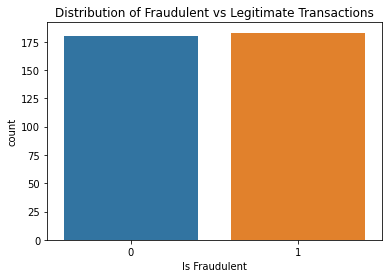

In [9]:
# Countplot for Fraudulent vs Legitimate Transactions
sns.countplot(x='Is Fraudulent', data=df)
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.show()

In [10]:
# Descriptive statistics for numerical columns
df.describe()

,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,977.349972,178.831956,177.966942,1.005510,1.528926,0.504132
std,581.386431,103.906683,102.929059,0.827679,1.105544,0.500673
min,14.290000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476.700000,89.500000,89.500000,0.000000,1.000000,0.000000
50%,992.100000,178.000000,178.000000,1.000000,2.000000,1.000000
75%,1469.630000,268.500000,266.500000,2.000000,2.500000,1.000000
max,1994.680000,358.000000,356.000000,2.000000,3.000000,1.000000


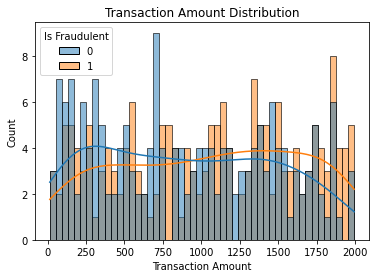

In [11]:
# Check the distribution of transaction amounts for fraudulent and non-fraudulent transactions
sns.histplot(data=df, x='Transaction Amount', hue='Is Fraudulent', bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Task 2: Feature Engineering:
- Create new features that might help in fraud detection, such as the frequency of transactions by a customer, the average transaction amount, or the time of day of transactions.
- Explore interactions between different features to improve model performance.

In [12]:
# Create a new feature: Transaction Hour
df['Transaction Hour'] = pd.to_datetime(df['Transaction Date']).dt.hour

# Create a new feature: Transaction Frequency by Customer
df['Transaction Frequency'] = df.groupby('Customer ID')['Transaction ID'].transform('count')

# Check new features
df[['Transaction Hour', 'Transaction Frequency']].head()

,Transaction Hour,Transaction Frequency
0,15,1
1,1,1
2,0,1
3,3,1
4,3,1


In [13]:
# Standardizing the 'Transaction Amount' and 'Transaction Frequency'
scaler = StandardScaler()
df[['Transaction Amount', 'Transaction Frequency']] = scaler.fit_transform(df[['Transaction Amount', 'Transaction Frequency']])

# Check standardized values
df[['Transaction Amount', 'Transaction Frequency']].head()

,Transaction Amount,Transaction Frequency
0,-1.284566,0.0
1,0.875565,0.0
2,-0.826787,0.0
3,-1.187888,0.0
4,-1.314846,0.0


# Task 3: Model Building:
- Split the dataset into training and testing sets.
- Experiment with different machine learning algorithms, such as Logistic Regression, Random Forest, or Gradient Boosting, to build a fraud detection model.
- Tune the model for optimal performance using techniques like cross-validation and grid search.
- Evaluate the model using metrics like accuracy, precision, recall, F1-score, and especially the area under the ROC curve (AUC-ROC) for imbalanced datasets.

In [16]:
# Split the data into features (X) and target (y)
X = df.drop(['Transaction ID', 'Customer ID', 'Is Fraudulent', 'Transaction Date'], axis=1)
y = df['Is Fraudulent']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Check the size of training and testing sets
print(f'Training Set: {X_train.shape}')
print(f'Test Set: {X_test.shape}')

Training Set: (254, 7)
Test Set: (109, 7)


In [21]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Task 4: Fraud Detection System Design:
- Based on your findings, design a real-time fraud detection system that could be implemented by the financial institution.
- Suggest methods for continuous learning and adaptation of the model as fraud patterns evolve.
- Provide recommendations on how to integrate this system with the existing transaction processing infrastructure.

Accuracy: 54.13%


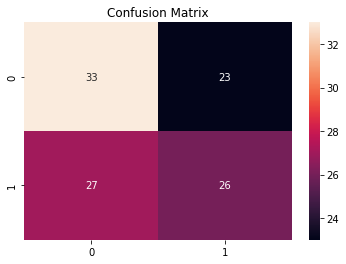

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        56
           1       0.53      0.49      0.51        53

    accuracy                           0.54       109
   macro avg       0.54      0.54      0.54       109
weighted avg       0.54      0.54      0.54       109



In [23]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

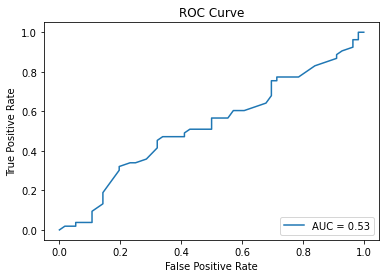

In [24]:
# Predict probabilities for AUC-ROC
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

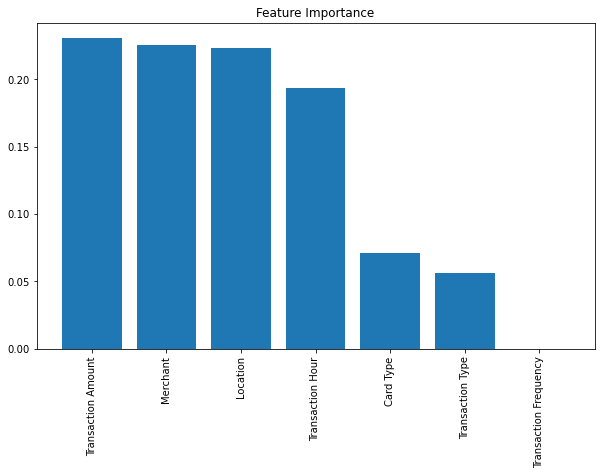

In [25]:
# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()